# Week 10 Problem Set

## Cohort Session

In [448]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**CS0.** Do the following tasks before you start with the first cohort session.

**Task 1.** Paste the following functions from your previous work:
- `get_features_targets()`
- `normalize_z()`
- `prepare_feature()`
- `prepare_target()`
- `split_data()`


In [449]:
def normalize_z(df):    
    return (df - df.mean()) / df.std()
    pass

def get_features_targets(df, feature_names, target_names):
    df_feature = df.loc[:, feature_names]
    df_target = df.loc[:, target_names]
    return df_feature, df_target

def prepare_feature(df_feature):
    left = np.ones((len(df_feature), 1))
    np_feature = df_feature.to_numpy()
    
    # axis = 1 indicates to move it along the x axis or in the way of the columns
    return np.concatenate((left, np_feature), axis=1)
    pass

def prepare_target(df_target):
    # Reshape is just to confirm that the shape is correct, but redundant here
    # df_target.to_numpy().reshape(-1, len(df_target.columns))
    return df_target.to_numpy()
    pass

def split_data(df_feature, df_target, random_state=None, test_size=0.5):
    np.random.seed(random_state)

    test_length = int(len(df_feature) * test_size)
    feature = np.random.choice(len(df_feature), len(df_feature), replace=False)
    
    df_feature_test = df_feature.loc[feature[:test_length], :]
    df_feature_train = df_feature.loc[feature[test_length:], :]    
    df_target_test = df_target.loc[feature[:test_length], :]
    df_target_train = df_target.loc[feature[test_length:], :]
    
    return df_feature_train, df_feature_test, df_target_train, df_target_test

**Task 2.** Load the breast cancer data from `breast_cancer_data.csv` into a Data Frame. 

In [450]:
# read breast_cancer_data.csv
df = pd.read_csv("breast_cancer_data.csv")

df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


**Task 3.** Do the following tasks.

- Read the following columns
    - feature: `radius_mean`
    - target: `diagnosis`
- Normalize the feature column using z normalization.

In [451]:
# extract the feature and the target
df_feature, df_target = get_features_targets(df, ["radius_mean"], ["diagnosis"])

# normalize the feature
df_feature = normalize_z(df_feature)

**Task 4.** Write a function `replace_target()` to replace the `diagnosis` column with the following mapping:
    - `M`: `1`, this means that malignant cell are indicated as `1` in our new column.
    - `B`: `0`, this means that benign cell are indicated as `0` in our new column.
    
The function should takes in the following:

- `df_target`: the target data frame
- `target_name`: which is the column name of the target data frame
- `map`: which is a dictionary containing the map
    
It should returns a new data frame with the same column name but with its values changed according to the mapping.

In [452]:
def replace_target(df_target, target_name, map_vals):
    df_out = df_target[target_name].map(map_vals).to_frame()
    return df_out

In [453]:
df_target = replace_target(df_target, "diagnosis", {'M': 1, 'B': 0})
df_target

,diagnosis
0,1
1,1
2,1
3,1
4,1
...,...
564,1
565,1
566,1
567,1


**Task 5.** Do the following tasks.
- Change feature to Numpy array and append constant 1 column.
- Change target to Numpy array

In [454]:
# change feature data frame to numpy array and append column 1
feature = prepare_feature(df_feature)

# change target data frame to numpy array
target = prepare_target(df_target)

**CS1.** *Logistic function:* Write a function to calculate the hypothesis using a logistic function. Recall that the hypothesis for a logistic regression model is written as:

$$\mathbf{p}(x) = \frac{1}{1 + e^{-\mathbf{X}\mathbf{b}}}$$

The shape of the input is as follows:
- $\mathbf{b}$: is a column vector for the parameters
- $\mathbf{X}$: is a matrix where the number of rows are the number of data points and the the number of columns must the same as the number of parameters in $\mathbf{b}$.

Note that you need to ensure that the output is a **column vector**. 

You can use the following functions:
- `np.matmul(array1, array2)`: which is to perform matrix multiplication on the two numpy arrays.
- `np.exp()`: which is to calculate the function $e^x$

In [455]:
def log_regression(beta, X):
    Xb = np.matmul(X, beta)
    px = 1 / (1 + np.exp(-Xb))
    return px

In [456]:
beta = np.array([0])
x = np.array([0])
ans = log_regression(beta, x)
assert ans == 0.5

beta = np.array([2])
x = np.array([40])
ans = log_regression(beta, x)
assert np.isclose(ans, 1.0)

beta = np.array([2])
x = np.array([-40])
ans = log_regression(beta, x)
assert np.isclose(ans, 0.0)

beta = np.array([[1, 2, 3]])
x = np.array([[3, 2, 1]])
ans = log_regression(beta.T, x)
assert np.isclose(ans.all(), 1.0)

beta = np.array([[1, 2, 3]])
x = np.array([[3, 2, 1], [3, 2, 1]])
ans = log_regression(beta.T, x)
assert ans.shape == (2, 1)
assert np.isclose(ans.all(), 1.0)

In [457]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


**CS2.** *Cost Function:* Write a function to calculate the cost function for logistic regression. Recall that the cost function for logistic regression is given by:

$$J(\beta) = -\frac{1}{m}\left[\Sigma_{i=1}^m y^i \log(p(x^i)) + (1 - y^i) \log(1 - p(x^i))\right]$$

You can use the following function in your code:
- `np.where(condition, then_expression, else_expression)`

In [458]:
def compute_cost_logreg(beta, X, y):
    np.seterr(divide = 'ignore')
    
    # px is a numpy here
    px = log_regression(beta, X)
    
    ylogpx = np.where(y == 1, np.log(px), np.log(1 - px))
    
    J = -1 / ylogpx.shape[0] * np.sum(ylogpx)
    np.seterr(divide = 'warn')
    return J

In [459]:
y = np.array([[1]])
X = np.array([[10, 40]])
beta = np.array([1, 1]).T
ans = compute_cost_logreg(beta, X, y)
print(ans)
assert np.isclose(ans, 0)

y = np.array([[0]])
X = np.array([[10, 40]])
beta = np.array([[-1, -1]]).T
ans = compute_cost_logreg(beta, X, y)
print(ans)
assert np.isclose(ans, 0)

-0.0
-0.0


In [4]:
import numpy as np

b = np.array(([3, 2, 1], [2, 1, 3]))
print(b.shape)

(2, 3)


In [460]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


**CS3.** *Gradient Descent:* Recall that the update functions can be written as a matrix multiplication.

$$\mathbf{b} = \mathbf{b} - \alpha\frac{1}{m}\mathbf{X}^T(\mathbf{p} - \mathbf{y}) $$

Write a function called `gradient_descent_logreg()` that takes in five parameters:
- `X`: is a 2-D numpy array for the features
- `y`: is a vector array for the target
- `beta`: is a column vector for the initial guess of the parameters
- `alpha`: is the learning rate
- `num_iters`: is the number of iteration to perform

The function should return two arrays:
- `beta`: is coefficient at the end of the iteration
- `J_storage`: is the array that stores the cost value at each iteration

The solution is similar to Linear Regression gradient descent function with two differences:
- you need to use `log_regression()` to calculate the hypothesis
- you need to use `compute_cost_logreg()` to calculate the cost

In [461]:
def gradient_descent_logreg(X, y, beta, alpha, num_iters):
    J_storage = compute_cost_logreg(beta, X, y)
    
    for _ in range(num_iters):
        p = log_regression(beta, X)
        beta = beta - alpha / y.shape[0] * np.matmul(X.T, p - y)
        J_storage = np.append(J_storage, compute_cost_logreg(beta, X, y))
        
    return beta, J_storage
    pass

In [462]:
iterations = 1500
alpha = 0.01
beta = np.zeros((2,1))
beta, J_storage = gradient_descent_logreg(feature, target, beta, alpha, iterations)
print(beta.shape)

(2, 1)


In [463]:
iterations = 1500
alpha = 0.01
beta = np.zeros((2,1))
beta, J_storage = gradient_descent_logreg(feature, target, beta, alpha, iterations)

print(beta)
assert beta.shape == (2, 1)
assert np.isclose(beta[0][0], -0.56630)
assert np.isclose(beta[1][0], 1.93764)

[[-0.56630289]
 [ 1.93763591]]


In [464]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


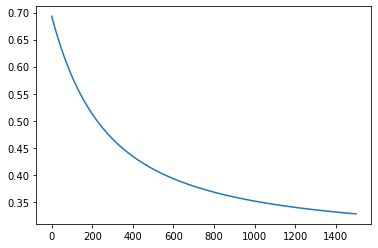

In [465]:
plt.plot(J_storage)

**CS4.** *Predict:* Write two functions `predict()` and `predict_norm()` that calculate the straight line equation given the features and its coefficient.
- `predict()`: this function should standardize the feature using z normalization, change it to a Numpy array, and add a column of constant 1s. You should use `prepare_feature()` for this purpose. Lastly, this function should also call `predict_norm()` to get the predicted y values.
- `predict_norm()`: this function should calculate the straight line equation after standardization and adding of column for constant 1.

You can use the following function in your code:
- `np.where()`

In [466]:
def predict_norm(X, beta):
    px = log_regression(beta, X)
    return np.where(px > 0.5, 1, 0)
    pass

In [467]:
def predict(df_feature, beta):
    df_feature = normalize_z(df_feature)
    df_feature = prepare_feature(df_feature)
    return predict_norm(df_feature, beta)
    pass

In [468]:
pred = predict(df_feature, beta)
print(pred.mean(), pred.std())
assert isinstance(pred, np.ndarray)
assert np.isclose(pred.mean(), 0.28998)
assert np.isclose(pred.std(), 0.45375)

0.28998242530755713 0.4537539182423709


In [469]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


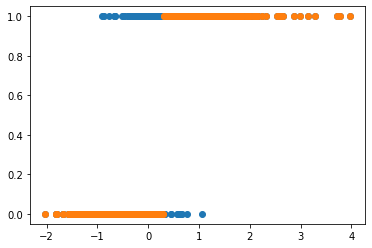

In [470]:
plt.scatter(df_feature, df_target)
plt.scatter(df_feature, pred)

**CS5.** *Multiple features and splitting of data set:* 

Do the following task in the code below:
- Read the following column names as the features: `"radius_mean", "texture_mean", "perimeter_mean", "area_mean", "smoothness_mean", "compactness_mean", "concavity_mean"`
- Read the column `diagnosis` as the target. Change the value from `M` and `B` to `1` and `0` respectively.
- Split the data set with 30% test size and `random_state = 100`.
- Normalize the training feature data set using `normalize_z()` function.
- Convert to numpy array both the target and the features using `prepare_feature()` and `prepare_target()` functions.
- Call `gradient_descent()` function to get the parameters using the training data set.
- Call `predict()` function on the test data set to get the predicted values.

In [471]:
columns = ["radius_mean", "texture_mean", "perimeter_mean", "area_mean", "smoothness_mean", "compactness_mean", "concavity_mean"]

# extract the features and the target columns
df_features, df_target = get_features_targets(df, columns, ["diagnosis"])

# replace the target values using from string to integer 0 and 1
df_target = replace_target(df_target, "diagnosis", {'M': 1, 'B': 0})

# split the data with random_state = 100 and 30% test size
df_features_train, df_features_test, df_target_train, df_target_test = split_data(df_features, df_target, 100, 0.3)

# normalize the features
df_features_train_z = normalize_z(df_features_train)

# change the feature columns to numpy array and append column of 1s
features = prepare_feature(df_features_train_z)

# change the target column to numpy array
target = prepare_target(df_target_train)

iterations = 1500
alpha = 0.01

# provide initial guess for theta
beta = np.zeros((8,1))

# call the gradient descent method
beta, J_storage = gradient_descent_logreg(features, target, beta, alpha, iterations)

print(beta)

[[-0.6139379 ]
 [ 0.82529554]
 [ 0.72746485]
 [ 0.8236603 ]
 [ 0.81647937]
 [ 0.5057749 ]
 [ 0.44176466]
 [ 0.78736842]]


In [472]:
assert beta.shape == (8, 1)
ans = np.array([[-0.6139379 ], 
                [ 0.82529554],
                [ 0.72746485],
                [ 0.8236603 ],
                [ 0.81647937],
                [ 0.5057749 ],
                [ 0.44176466],
                [ 0.78736842]])
assert np.isclose(beta, ans).all()

In [473]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


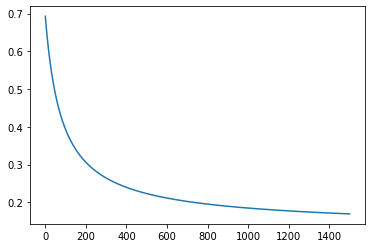

In [474]:
plt.plot(J_storage)

In [475]:
# call predict() to get the predicted values
pred = predict(df_features_test, beta)

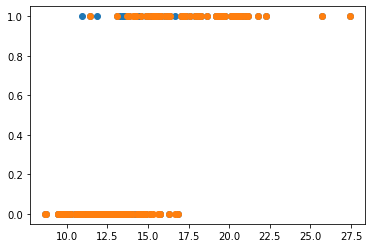

In [476]:
plt.scatter(df_features_test["radius_mean"], df_target_test)
plt.scatter(df_features_test["radius_mean"], pred)

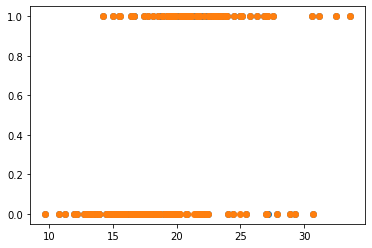

In [477]:
plt.scatter(df_features_test["texture_mean"], df_target_test)
plt.scatter(df_features_test["texture_mean"], pred)

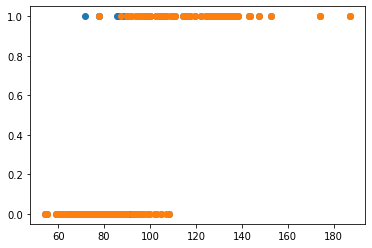

In [478]:
plt.scatter(df_features_test["perimeter_mean"], df_target_test)
plt.scatter(df_features_test["perimeter_mean"], pred)

**CS6.** *Confusion Matrix:* Write a function `confusion_matrix()` that takes in:
- `ytrue`: which is the true target values
- `ypred`: which is the predicted target values
- `labels`: which is a list of the category. In the above case it will be `[1, 0]`. Put the positive case as the first element of the list. 

The function should return a dictionary containing the matrix with the following format.

|                 | predicted positive (1) | predicted negative (0) |
|-----------------|--------------------|--------------------|
| actual positive (1) | correct positive  (1, 1) | false negative (1, 0)    |
| actual negative (0) | false positive (0, 1)   | correct negative (0, 0)   |

The keys to the dictionary are the indices: `(0, 0), (0, 1), (1, 0), (1, 1)`.

You can use the following function in your code:
- `itertools.product()`: this is to create a combination of all the labels. 

In [479]:
import itertools
def confusion_matrix(ytrue, ypred, labels):
    output = {}
    
    for outcome in list(itertools.product(labels, labels)):
        output[outcome] = 0
    
    # Add ytrue and ypred together
    compare = np.concatenate((ytrue, ypred), axis = 1)
    
    for each in compare:
        output[tuple(each)] += 1
        
    return output

In [480]:
result = confusion_matrix(df_target_test.values, pred, [1,0])
print(result)
assert result == {(0, 0): 100, (0, 1): 1, (1, 0): 12, (1, 1): 57}

{(1, 1): 57, (1, 0): 12, (0, 1): 1, (0, 0): 100}


**CS7.** *Metrics:* Write a function `calc_accuracy()` that takes in a Confusion Matrix array and output a dictionary with the following keys and values:
- `accuracy`: total number of correct predictions / total number of records
- `sensitivity`: total correct positive cases / total positive cases
- `specificity`: total false positives / total negative cases
- `precision`: total  of correct positive cases / total predicted positive cases

In [481]:
def calc_accuracy(cm):
    accuracy = (cm[(1, 1)] + cm[(0, 0)]) / sum(cm.values())
    sensitivity = cm[(1, 1)] / (cm[(1, 1)] + cm[(1, 0)])
    specificity = cm[(0, 0)] / (cm[(0, 0)] + cm[(0, 1)])
    precision = cm[(1, 1)] / (cm[(1, 1)] + cm[(0, 1)])
    
    result = {'accuracy': accuracy, 'sensitivity': sensitivity,
              'specificity': specificity, 'precision': precision}
    return result

In [482]:
ans = calc_accuracy(result)
expected = {'accuracy': 0.9235294117647059, 'sensitivity': 0.8260869565217391, 'specificity': 0.9900990099009901, 'precision': 0.9827586206896551}
assert np.isclose(ans['accuracy'], expected['accuracy'])
assert np.isclose(ans['sensitivity'], expected['sensitivity'])
assert np.isclose(ans['specificity'], expected['specificity'])
assert np.isclose(ans['precision'], expected['precision'])
 

**CS8.** *Optional:* Redo the above tasks using Scikit Learn libraries. You will need to use the following:
- [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
- [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)
- [confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)

In [483]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [484]:
columns = ["radius_mean", "texture_mean", "perimeter_mean", "area_mean", "smoothness_mean", "compactness_mean", "concavity_mean"]

# extract the features and the target columns
df_features, df_target = get_features_targets(df, columns, ["diagnosis"])

# replace target values with 0 and 1
df_target = replace_target(df_target, "diagnosis", {'M': 1, 'B': 0})

In [485]:
# split data set using random_state = 100 and 30% test size
df_features_train, df_features_test, df_target_train, df_target_test = train_test_split(df_features, df_target, random_state = 100, test_size = 0.3)

# change feature to numpy array and append column of 1s
feature = prepare_feature(df_features_train)

# change target to numpy array
target = prepare_target(df_target_train)

In [487]:
# create LogisticRegression object instance, use newton-cg solver
model = wa

# build model
model.fit(feature, target)

# get predicted value
pred = model.predict(prepare_feature(df_features_test))

/usr/lib/python3.7/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [488]:
# calculate confusion matrix
# Positive case is maglinant = 1, negative = 0
cm = confusion_matrix(df_target_test, pred, labels=[1,0])
cm

array([[58, 11],
       [ 6, 96]])

In [489]:
expected = np.array([[58,  11], [6, 96]])
assert (cm == expected).all()

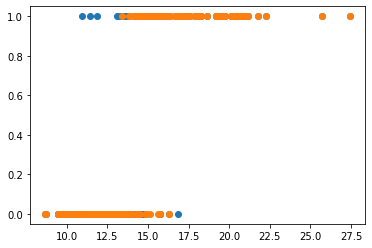

In [490]:
plt.scatter(df_features_test["radius_mean"], df_target_test)
plt.scatter(df_features_test["radius_mean"], pred)

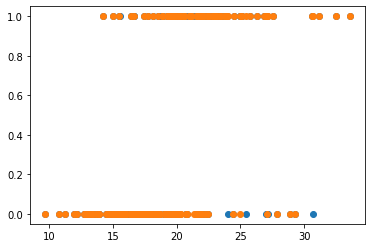

In [491]:
plt.scatter(df_features_test["texture_mean"], df_target_test)
plt.scatter(df_features_test["texture_mean"], pred)

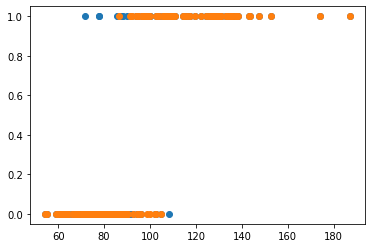

In [492]:
plt.scatter(df_features_test["perimeter_mean"], df_target_test)
plt.scatter(df_features_test["perimeter_mean"], pred)